In [198]:
# Things to do:

    # Regex out a clean seriesname at some point

In [199]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import calendar
import math
from textwrap import wrap

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

In [200]:
# The location


url = 'https://www.abs.gov.au/statistics/economy/finance/monthly-household-spending-indicator/mar-2024/5682001_National.xlsx'

In [201]:
# Get the file
resp = requests.get(url)

In [202]:
# Open a new file to save down as
output = open('5682001_National.xlsx', 'wb')
output.write(resp.content)
output.close()

In [203]:
dataSetLF = pd.read_excel('5682001_National.xlsx', 'Data1');

##ABS Household Spending Indicator

In [204]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)


Graphs and data updated at 21:50:04 on 09-05-2024


In [205]:
metaDataDict = {}

for col in dataSetLF:
    #print('A new column')
    #print(col)
    unit = dataSetLF[col][0]
    #print(seasAdjust)
    seasAdjust = dataSetLF[col][1]
    #print(seasAdjust)
    dataType = dataSetLF[col][2]
    #print(dataType)
    frequency = dataSetLF[col][3]
    #print(frequency)
    collectionMonth = dataSetLF[col][4]
    #print(collectionMonth)
    startDate = dataSetLF[col][5]
    #print(startDate)
    endDate = dataSetLF[col][6]
    #print(endDate)
    numberObs = dataSetLF[col][7]
    #print(numberObs)
    seriesNumber = dataSetLF[col][8]
    #print(seriesNumber)
    
    dictName = seriesNumber
    
    seriesDict = {
    "seriesName" : col,
    "unit" : unit,
    "seriesType" : seasAdjust,
    "dataType" : dataType,
    "startDate" : startDate,
    "endDate" : endDate,
    "seriesNumber" : seriesNumber
    }
    
    #print(dictName)
    
    metaDataDict[seriesNumber] = seriesDict
    

In [206]:
# Name the columns after the ABS series ID and fix the date column

dataSetLF.columns = dataSetLF.iloc[8];

dataSetLF = dataSetLF[9:]

dataSetLF.columns = dataSetLF.columns.str.replace('Series ID', 'Date') #Rename the date column

#dataSetLF.head(10)


In [207]:
last_data = dataSetLF["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for March 2024


In [208]:
def graph_series_abs(seriesCode, data, startDate, endDate, lastPointOption, metaData, horizLineValue=0):
    
    metaData = metaDataDict[seriesCode]
    
    #print(metaData)
    
    seriesName = metaData.get('seriesName')
    #print(seriesName)
    
    #Get the data
    values = data[seriesCode]
    dates = data["Date"]
    

    
    #Filter to the desired date range
    mask = (data.loc[:,'Date'] >= startDate) & (data.loc[:,'Date'] <= endDate)
    dataToGraph = values.loc[mask]
    datesToGraph = dates.loc[mask]
    
    #Get range for vertical axis
    maxValue = max(dataToGraph)
    minValue = min(dataToGraph)
    difference = maxValue - minValue
    
    vertRangeUpper = math.ceil(maxValue + difference * .1)
    vertRangeLower = math.floor(minValue - difference * .1) 
    
    #print(vertRangeUpper)
    #print(vertRangeLower)
    
    #Only use years as labels on the horiztonal axis
    yearsToGraph = [date for date in datesToGraph if date.month == 1]
    
    #If more than 10 years, cuts the labelling and ticks down to every second year
    if len(yearsToGraph) > 12:
        yearsToGraph = [date for date in datesToGraph if date.month == 1 and (date.year % 2 == 0)]
    
    #Extract year labels
    yearsOnly = [date.year for date in yearsToGraph if date.month == 1 ]
    
    #Just hashed out for a test
    plt.rcParams.update({'font.size': 14})
    font = {'size'   : 14}
    matplotlib.rc('font', **font)
    
    # Create a figure containing a single axes.
    fig, ax = plt.subplots()
    
    fig.set_size_inches(7, 5, forward=True)
    
    # Make the figure
    ax.plot(datesToGraph, dataToGraph, 'b', linewidth= '3')

    
    ax.axhline(y=horizLineValue, color='black', linestyle='-', linewidth= '1')
    
    # Get the last data point for highlighting 
    lastData = dataToGraph.values[-1]
    lastDate = datesToGraph.values[-1]
    
    # X-ticks set as calculated above
    ax.set_xticks(yearsToGraph)
    
    # All graphs named by series plus per cent in subtitle (could be better)
    units = metaData.get('unit')
    seriesType = metaData.get('seriesType')
    ax.set_title("\n".join(wrap(seriesName + "\n" + seriesType + ", " + units , 60)))
    
    # X-axis labels are whole years only 
    ax.set_xticklabels(yearsOnly)
    
    ax.tick_params(labelleft=True, labelright=True)
                     #bottom=True, top=False, left=False, right=False)
    
    ax.set_ylim([vertRangeLower, vertRangeUpper])
    
    #Make the chart start show whole years only
    last_day_of_last_year = endDate.replace(month=12, day=31)    
    first_day_of_first_year = startDate.replace(month=1, day=1)
    ax.set_xlim([first_day_of_first_year, last_day_of_last_year])
    
    
    
    #Fonts
    
    #horizAxisStart = ax.get_xlim()[0]
    #print(horizAxisStart)
    #horizAxisEnd = ax.get_xlim()[1]
    #print(horizAxisEnd)
    #horizAxisLength = horizAxisEnd - horizAxisStart
    #print()
    
    #vertAxisStart = ax.get_ylim()[0]
    #print(vertAxisStart)
    #vertAxisEnd = ax.get_ylim()[1]
    #print(vertAxisEnd)
    #vertAxisLength = vertAxisEnd - vertAxisStart
    
    
    if lastPointOption:
        
        ax.plot(lastDate, lastData, 'r.', markersize= '10')
        
        lastDateMonth = calendar.month_name[lastDate.month] 
        
        unitForText = units
        if unitForText == "000":
            unitForText = " thousand"
        else:
            unitForText = " percent"
    
        #Add some metadata for the last datapoint
        textstr = "Latest data point is " + str(round(lastData,2)) \
        + unitForText + " for \n" + calendar.month_name[lastDate.month] + " " + str(lastDate.year)
        props = dict(boxstyle='round', facecolor='none', alpha=0.5, edgecolor='none')
        ax.text(.4,.10, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='left', bbox=props, color = 'red')

    filename = seriesName + str(startDate) + str(endDate) + ".jpg"
    #print(filename)
    plt.savefig(filename)

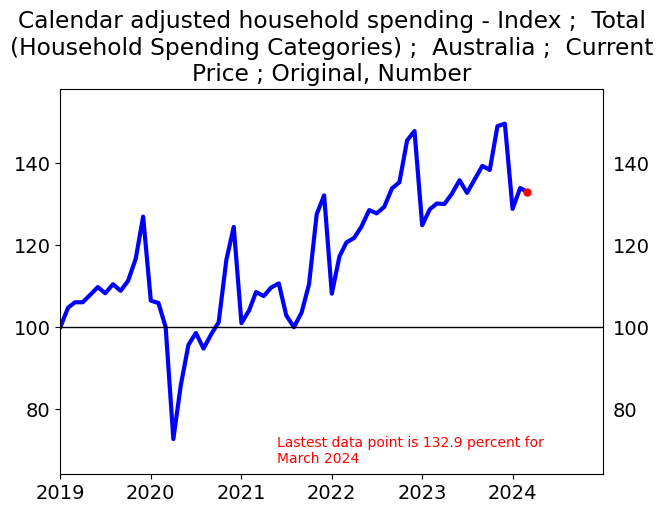

In [215]:
startDateExample = datetime(2019, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A129534675T'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,100)

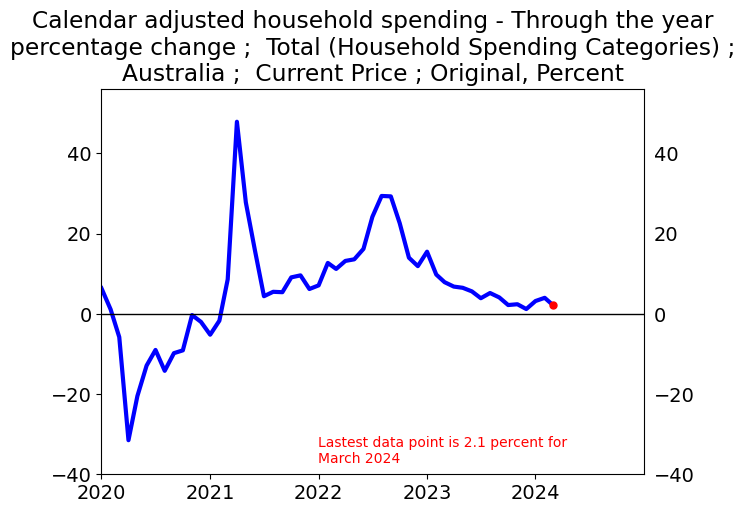

In [210]:
startDateExample = datetime(2020, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A129534673L'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,0)

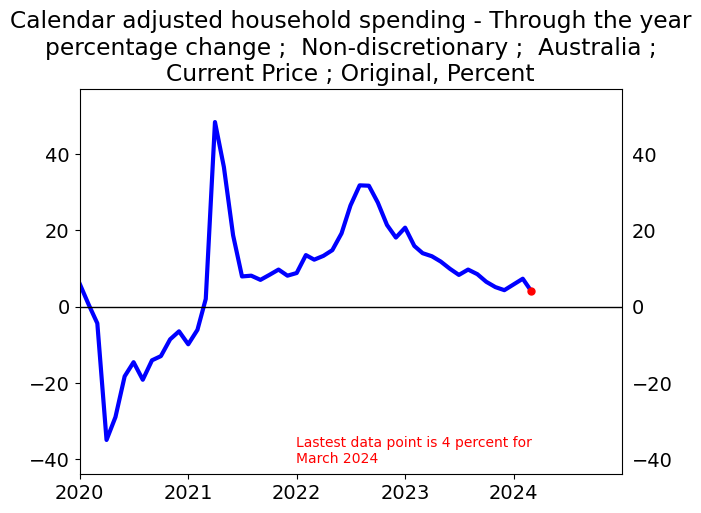

In [211]:
startDateExample = datetime(2020, 1, 1)
endDateExample = datetime(2024, 12, 1)
seriesToGraph = 'A129534865F'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,0)

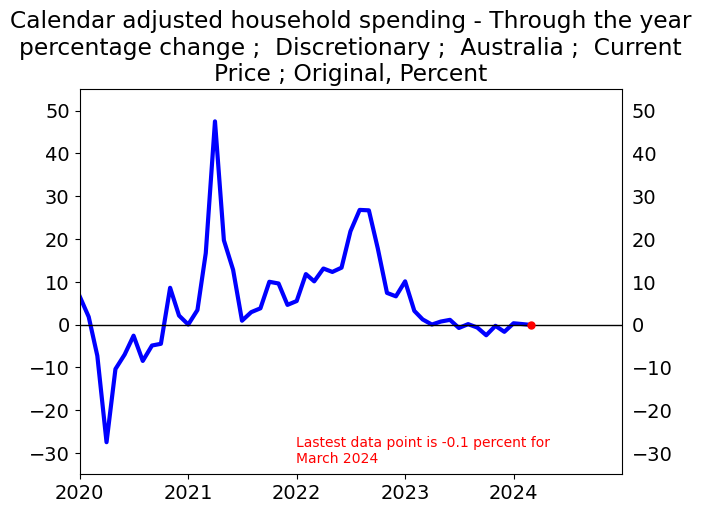

In [212]:
startDateExample = datetime(2020, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A129534881F'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,0)



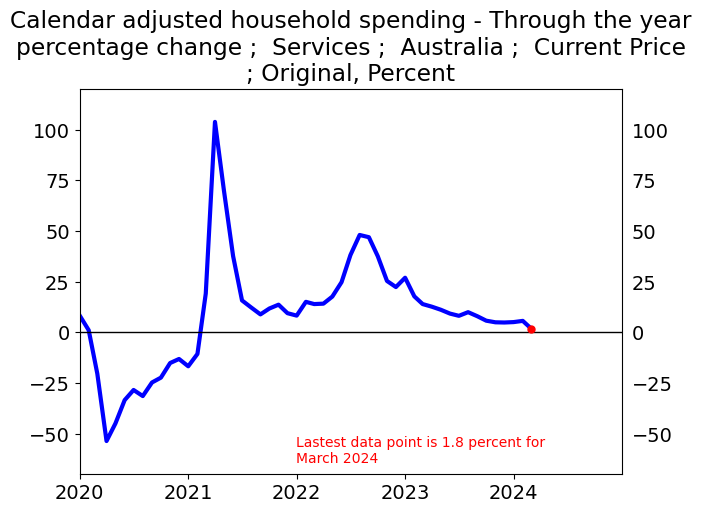

In [213]:
startDateExample = datetime(2020, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A129534689F'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,0)


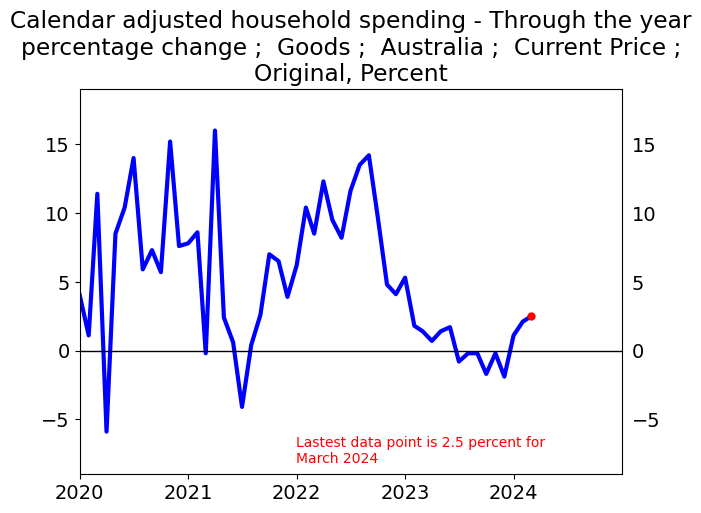

In [214]:
startDateExample = datetime(2020, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A129534897X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict,0)
